In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [3]:
# Read example data
ds_o3 = xr.open_dataset('data/aw139a/aw139a_pm1986_O3.nc')
ds_o3

<xarray.Dataset>
Dimensions:    (hybrid_ht: 85, latitude: 144, longitude: 192, t: 12)
Coordinates:
  * hybrid_ht  (hybrid_ht) float32 19.999998 53.333336 100.00004 160.0 ...
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 -85.625 -84.375 ...
  * longitude  (longitude) float32 0.9375 2.8125 4.6875 6.5625 8.4375 ...
  * t          (t) datetime64[ns] 1986-01-16 1986-02-16 1986-03-16 ...
Data variables:
    field2101  (t, hybrid_ht, latitude, longitude) float32 ...
Attributes:
    title:                     Unified Model Output
    um_version:                10.6.1
    um_suite:                  u-aw139
    source:                    aw139a.pm1986jan.pp
    history:                   Mon Apr  2 14:33:54 2018: ncks -v field2101 aw...
    Conventions:               CF-1.5
    NCO:                       "4.5.5"
    nco_openmp_thread_number:  1

In [3]:
# Create UKCA grid
lons, lats = np.meshgrid(ds_o3.longitude, ds_o3.latitude)

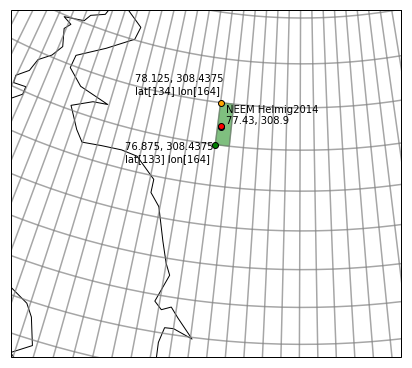

In [4]:
# Plot UKCA grid and NEEM location
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(projection=ccrs.LambertConformal(central_longitude=-40.0)), facecolor='w')
ax.coastlines();
ax.set_extent([-70, -30, 70, 80], crs=ccrs.PlateCarree())
# UKCA grid
ax.plot(lons, lats, color='grey', alpha=0.7, transform=ccrs.PlateCarree());
ax.plot(lons.T, lats.T, color='grey', alpha=0.7, transform=ccrs.PlateCarree());
# NEEM location
x_helmig2014, y_helmig2014 = -51.10, 77.43
x_wiki, y_wiki = -51.07, 77.45
ax.plot(x_helmig2014, y_helmig2014, color='blue', linewidth=1, marker='o', markeredgecolor='k', transform=ccrs.PlateCarree());
ax.plot(x_wiki, y_wiki, color='red', linewidth=1, marker='o', markeredgecolor='k', transform=ccrs.PlateCarree());
ax.text(x_helmig2014+0.6, y_helmig2014+0.1, 'NEEM Helmig2014\n'+str(y_helmig2014)+', '+str(x_helmig2014+360), 
        transform=ccrs.PlateCarree());
# UKCA grid nodes around NEEM
x1, y1 = lons[133,164], lats[133,164]
x2, y2 = lons[134,164], lats[134,164]
x3, y3 = lons[134,165], lats[134,165]
x4, y4 = lons[133,165], lats[133,165]
boxx, boxy = [x1, x2, x3, x4, x1], [y1, y2, y3, y4, y1]
ax.plot(x1, y1, color='green', linewidth=1, marker='o', markeredgecolor='k', transform=ccrs.PlateCarree());
ax.plot(x2, y2, color='orange', linewidth=1, marker='o', markeredgecolor='k', transform=ccrs.PlateCarree());
ax.fill(boxx, boxy, color='green', alpha=0.5, transform=ccrs.PlateCarree());
ax.text(x1-11, y1-1, str(y1)+', '+str(x1)+'\nlat[133] lon[164]', transform=ccrs.PlateCarree());
ax.text(x2-12, y2-0.2, str(y2)+', '+str(x2)+'\nlat[134] lon[164]', transform=ccrs.PlateCarree());

#### Nearest grid node using numpy

In [5]:
np.argmin(abs(lons[0, :] - (360 + x_helmig2014)))

164

In [6]:
np.argmin(abs(lats[:, 0] - y_helmig2014))

133

In [7]:
x_helmig2014, y_helmig2014

(-51.1, 77.43)

In [9]:
x_mhd = -9.899
y_mhd = 53.326

In [10]:
np.argmin(abs(lons[0, :] - (360 + x_mhd)))

186

In [11]:
np.argmin(abs(lats[:, 0] - y_mhd))

114

#### Nearest grid node using xarray http://xarray.pydata.org/en/stable/indexing.html#nearest-neighbor-lookups

In [7]:
ds_o3.longitude.sel(longitude=(360+x_helmig2014), method='nearest')

<xarray.DataArray 'longitude' ()>
array(308.4375, dtype=float32)
Coordinates:
    longitude  float32 308.4375
Attributes:
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east
    axis:           X

In [8]:
ds_o3.latitude.sel(latitude=y_helmig2014, method='nearest')

<xarray.DataArray 'latitude' ()>
array(76.875, dtype=float32)
Coordinates:
    latitude  float32 76.875
Attributes:
    long_name:      latitude
    standard_name:  latitude
    units:          degrees_north
    axis:           Y

#### Shortest geodesic distance using geopy 

In [9]:
from geopy import distance
x1, y1 = lons[133,164], lats[133,164]
x2, y2 = lons[134,164], lats[134,164]
neem_helmig2014 = (77.43, -51.10)
neem_ukca1 = (lats[133,164], lons[133,164])
neem_ukca2 = (lats[134,164], lons[134,164])
print('lat[133], lon[164]:', distance.distance(neem_helmig2014, neem_ukca1).km, ' km')
print('lat[134], lon[164]:', distance.distance(neem_helmig2014, neem_ukca2).km, ' km')

lat[133], lon[164]: 63.01410525343253  km
lat[134], lon[164]: 78.35826246976622  km
